In [3]:
import pandas as pd
import glob
import os


def search_proposals(country, data, col):  # Function to replace countries
    elements = country.split()
    proposals = []
    for j in elements:
        if j != 'and':
            proposals.extend(data[data[col].str.contains(j)][col].values)
    if len(proposals) > 0:
        return proposals
    else:
        return 'No proposals found. You may consider removing this object!'


# import all wh-happiness files and concatenate to one dataframe
path = r'data'
wh_files = glob.glob(os.path.join(path, "2*.csv"))
df_from_each_file = (pd.read_csv(f) for f in wh_files)
world_happiness = pd.concat(df_from_each_file, ignore_index=False, keys=['2015', '2016', '2017', '2018', '2019'])

# import countries of the world
countries_of_the_world = pd.read_csv('data/countries of the world.csv')

# merge columns of importance that mean the same
world_happiness['Country'] = world_happiness['Country'].combine_first(world_happiness['Country or region'])
world_happiness['Happiness Score'] = world_happiness['Happiness Score'].combine_first(
    world_happiness['Happiness.Score'])
world_happiness['Happiness Score'] = world_happiness['Happiness Score'].combine_first(world_happiness['Score'])
world_happiness['Happiness Rank'] = world_happiness['Happiness Rank'].combine_first(world_happiness['Happiness.Rank'])
world_happiness['Happiness Rank'] = world_happiness['Happiness Rank'].combine_first(world_happiness['Overall rank'])





# remove country duplicates and sort alphabetically
countries_wh = world_happiness.copy()
countries_wh = countries_wh.drop_duplicates(subset='Country')
countries_wh.reset_index(inplace=True, drop=True)
countries_wh.sort_values(by='Country', inplace=True)

# remove white space at the end of all countries for easier comparison and sort alphabetically
countries_of_the_world['Country'] = countries_of_the_world['Country'].str[:-1]
countries_of_the_world.sort_values(by='Country', inplace=True)

# compare and rename or remove differently named countries
for i in countries_wh['Country']:
    if i not in countries_of_the_world['Country'].values:
        print('The country', i, ' may be spelled wrong. I found the following proposals: ',
              search_proposals(i, countries_of_the_world, 'Country'))
        action = str(input(
            'Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:'))
        if action == 'r':
            world_happiness.drop(world_happiness[world_happiness['Country'] == i].index, inplace=True)
        else:
            world_happiness['Country'] = world_happiness['Country'].replace({i: action})

# Create new csv files with new names and equal number of columns
world_happiness.loc['2015'].to_csv('wh-2015_new.csv', index=False)
world_happiness.loc['2016'].to_csv('wh-2016_new.csv', index=False)
world_happiness.loc['2017'].to_csv('wh-2017_new.csv', index=False)
world_happiness.loc['2018'].to_csv('wh-2018_new.csv', index=False)
world_happiness.loc['2019'].to_csv('wh-2019_new.csv', index=False)

The country Bosnia and Herzegovina  may be spelled wrong. I found the following proposals:  ['Bosnia & Herzegovina', 'Bosnia & Herzegovina']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Bosnia & Herzegovina
The country Central African Republic  may be spelled wrong. I found the following proposals:  ['Central African Rep.', 'Central African Rep.', 'Czech Republic', 'Dominican Republic']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Central African Rep.


C:\Users\Karim\AppData\Local\Temp/ipykernel_20100/3928423918.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  proposals.extend(data[data[col].str.contains(j)][col].values)


The country Congo (Brazzaville)  may be spelled wrong. I found the following proposals:  ['Congo, Dem. Rep.', 'Congo, Repub. of the']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Congo, Dem. Rep.
The country Congo (Kinshasa)  may be spelled wrong. I found the following proposals:  ['Congo, Dem. Rep.', 'Congo, Repub. of the']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Congo, Dem. Rep.
The country Gambia  may be spelled wrong. I found the following proposals:  ['Gambia, The']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Gambia, The
The country Hong Kong S.A.R., China  may be spelled wrong. I found the following proposals:  ['Hong Kong', 'Hong Kong', 'China']
Do you wish to replace or remove this country? Type the new name for replacement, or "r" for removal:Hong Kong
The country Ivory Coast  may be spelled wrong. I found

In [8]:
import psycopg2
import pandas as pd

con = psycopg2.connect(
  database="fced_karim_kousa",             # your database is the same as your username
  user="fced_karim_kousa",                 # your username
  password="kousa",                          # your password
  host="dbm.fe.up.pt",                      # the database host
  port="5433",
  options='-c search_path=project'     # use the schema you want to connect to
)

cur = con.cursor()
cur.execute(f'DELETE FROM happiness')
cur.execute(f'DELETE FROM country')


countries = pd.read_csv('data/countries of the world.csv', decimal=',')
countries['Country'] = countries['Country'].str[:-1]
cols = ['Country', 'Population', 'Area (sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Region', 'Climate']

countries = countries[cols]
records = countries.values.tolist()

sql_insert = '''
  INSERT INTO country (country_name, population, area, infant_mortality, gdp, literacy, region, climate) 
  VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
  '''

print(countries.loc[223])
cur.executemany(sql_insert, records[:223])  # Western Sahara produces error...
cur.executemany(sql_insert, records[224:])
con.commit()

Country                                                    Western Sahara
Population                                                         273008
Area (sq. mi.)                                                     266000
Infant mortality (per 1000 births)                                    NaN
GDP ($ per capita)                                                    NaN
Literacy (%)                                                          NaN
Region                                NORTHERN AFRICA                    
Climate                                                               1.0
Name: 223, dtype: object


In [13]:
import psycopg2
import pandas as pd
import sys

#print (sys.argv[1])
#print (sys.argv[2])  # use year as input argument
years = [2015, 2016,2017,2018,2019]

con = psycopg2.connect(
  database="fced_karim_kousa",             # your database is the same as your username
  user="fced_karim_kousa",                 # your username
  password="kousa",                       # your password
  host="dbm.fe.up.pt",                      # the database host
  port="5433",
  options='-c search_path=project'     # use the schema you want to connect to
)


records = []
for year in years:
    cur = con.cursor()
    cur.execute(f'DELETE FROM happiness')
    
    happiness = pd.read_csv('data/wh-'+str(year)+'_new.csv', decimal=',')
    cols = ['Happiness Rank','Country', 'Happiness Score']
    
    happiness = happiness[cols]
    string_list = happiness['Happiness Rank']

    happiness['Happiness Rank'] = [int(float(i)) for i in happiness['Happiness Rank']]
    
    
    happiness.reset_index(inplace=True)
    happiness['year'] = year
    print(happiness)
    
    rec = happiness.values.tolist()
    records=[*records,*rec]
    
c=1
for sub in records:
    sub.insert(0,c)
    sub.pop(1)
    c+=1
    
sql_insert = '''
  INSERT INTO happiness (ref, rank, country_name, happiness_score,year) 
  VALUES (%s,%s, %s, %s,%s)
  '''
  
  
print(records)
cur.executemany(sql_insert, records)
con.commit()

     index  Happiness Rank      Country Happiness Score  year
0        0               1  Switzerland           7.587  2015
1        1               2      Iceland           7.561  2015
2        2               3      Denmark           7.527  2015
3        3               4       Norway           7.522  2015
4        4               5       Canada           7.427  2015
..     ...             ...          ...             ...   ...
147    147             154       Rwanda           3.465  2015
148    148             155        Benin            3.34  2015
149    149             156        Syria           3.006  2015
150    150             157      Burundi           2.905  2015
151    151             158         Togo           2.839  2015

[152 rows x 5 columns]
     index  Happiness Rank      Country Happiness Score  year
0        0               1      Denmark           7.526  2016
1        1               2  Switzerland           7.509  2016
2        2               3      Iceland       

In [293]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys


con = psycopg2.connect(
  database="fced_karim_kousa",             # your database is the same as your username
  user="fced_karim_kousa",                 # your username
  password="kousa",                       # your password
  host="dbm.fe.up.pt",                      # the database host
  port="5433",
  options='-c search_path=project'     # use the schema you want to connect to
)

cur = con.cursor()
cur.execute(f'SELECT * FROM happiness')
happiness = pd.DataFrame(cur.fetchall())
happiness.columns = ['ref','rank','happiness_score','country_name','year']
cur.execute(f'SELECT * FROM country')
country = pd.DataFrame(cur.fetchall())
country.columns = ['country_name',	'population','area', 'infant_mortality','gdp','literacy',	
                   'region','climate']

cur.execute(f'SELECT country_name,gdp,happiness_score FROM country JOIN happiness USING(country_name)')
g_h=pd.DataFrame(cur.fetchall())
g_h.columns=['country_name','gdp','happiness_score']


cur.execute(f'SELECT country_name,gdp,AVG(happiness_score)as happiness_score\n' +
            'FROM country JOIN happiness USING(country_name)group by country_name ORDER BY AVG(happiness_score)DESC')
g_h_AVG=pd.DataFrame(cur.fetchall())
g_h_AVG.columns=['country_name','gdp','happiness_score']

con.close()

In [294]:
k=happiness.groupby(['country_name'])['happiness_score'].mean()
k

country_name
Afghanistan    3.51280
Albania        4.71260
Algeria        5.66760
Angola         3.87225
Argentina      6.45940
                ...   
Venezuela      5.53140
Vietnam        5.15460
Yemen          3.62580
Zambia         4.58440
Zimbabwe       4.00660
Name: happiness_score, Length: 155, dtype: float64

(array([ 1.,  2.,  4.,  4.,  0.,  3.,  8., 11., 12., 13., 14.,  9., 13.,
        12., 18., 19., 23., 31., 19., 26., 15., 16., 15., 22., 33., 30.,
        18., 20., 15., 15., 34., 25., 29., 22., 15., 17., 26., 16., 16.,
         9.,  9., 17., 11.,  9.,  8., 19.,  8., 19.,  4.,  1.]),
 array([2.693  , 2.79452, 2.89604, 2.99756, 3.09908, 3.2006 , 3.30212,
        3.40364, 3.50516, 3.60668, 3.7082 , 3.80972, 3.91124, 4.01276,
        4.11428, 4.2158 , 4.31732, 4.41884, 4.52036, 4.62188, 4.7234 ,
        4.82492, 4.92644, 5.02796, 5.12948, 5.231  , 5.33252, 5.43404,
        5.53556, 5.63708, 5.7386 , 5.84012, 5.94164, 6.04316, 6.14468,
        6.2462 , 6.34772, 6.44924, 6.55076, 6.65228, 6.7538 , 6.85532,
        6.95684, 7.05836, 7.15988, 7.2614 , 7.36292, 7.46444, 7.56596,
        7.66748, 7.769  ]),
 <BarContainer object of 50 artists>)

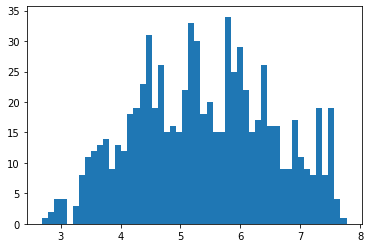

In [295]:
plt.hist(happiness.happiness_score,bins = 50)

[8.06795289e-05] 4.614300719311094 0.7398236809052223


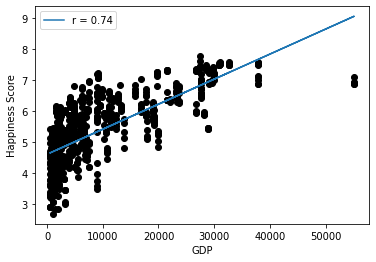

In [305]:
x=np.array(g_h.gdp).reshape(-1,1)

y=g_h.happiness_score

model = LinearRegression().fit(x, y)

'''
y=mx+b
'''
m= model.coef_
b =model.intercept_
r_sq=model.score(x, y)
r=np.sqrt(r_sq)
r_rounded=np.round(r,2)

plt.scatter(x,y,color='k')
plt.plot(x, m*x+b,'-',label = (f'r = {r_rounded}'))
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.legend()
print(m,b,np.sqrt(r_sq))

There is a strong positive correlation between GDP and Happiness Score, which means as DGP go higher so does the Happiness Score

[8.14388959e-05] 4.623379060230663 0.7494656510273319


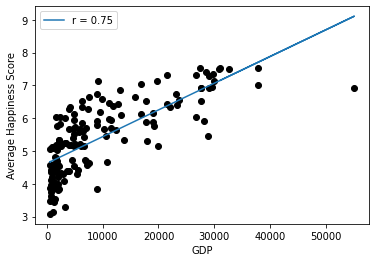

In [298]:
x=np.array(g_h_AVG.gdp).reshape(-1,1)

y=g_h_AVG.happiness_score

model = LinearRegression().fit(x, y)

'''
y=mx+b
'''
m= model.coef_
b =model.intercept_
r_sq=model.score(x, y)
r=np.sqrt(r_sq)
r_rounded=np.round(r,2)

plt.scatter(x,y,color='k')
plt.plot(x, m*x+b,'-',label = (f'r = {r_rounded}'))
plt.xlabel('GDP')
plt.ylabel('Average Happiness Score')
plt.legend()
print(m,b,np.sqrt(r_sq))

There is a strong positive correlation between GDP and average of Happiness Score, which means as DGP go higher so does the average Happiness Score, increasinglu supporting our previous point

(array([42., 32., 14., 14., 15., 14.,  7.,  9.,  4.,  8.,  3.,  3.,  2.,
         3.,  3.,  6.,  5.,  6.,  2.,  4.,  2.,  1.,  2.,  1.,  6.,  4.,
         4.,  2.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  500.,  1592.,  2684.,  3776.,  4868.,  5960.,  7052.,  8144.,
         9236., 10328., 11420., 12512., 13604., 14696., 15788., 16880.,
        17972., 19064., 20156., 21248., 22340., 23432., 24524., 25616.,
        26708., 27800., 28892., 29984., 31076., 32168., 33260., 34352.,
        35444., 36536., 37628., 38720., 39812., 40904., 41996., 43088.,
        44180., 45272., 46364., 47456., 48548., 49640., 50732., 51824.,
        52916., 54008., 55100.]),
 <BarContainer object of 50 artists>)

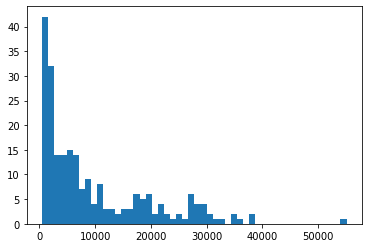

In [299]:
plt.hist(country.gdp,bins = 50)

Most of the countries have low GDP and very few countries have GDP higher than 50000

[[0.00094665]] [74.39218868] 0.49718583783498743


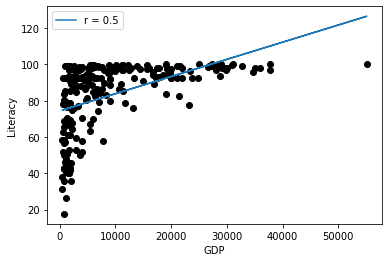

In [306]:
x=np.array(country.gdp).reshape(-1,1)

y=country.literacy

y = np.array(y).reshape(y.size,1)
y = y.astype(np.float64, copy=False)
y[np.isnan(y)] = np.median(y[~np.isnan(y)])

model = LinearRegression().fit(x, y)

'''
y=mx+b
'''
m= model.coef_
b =model.intercept_
r_sq=model.score(x, y)
r=np.sqrt(r_sq)
r_rounded=np.round(r,2)

plt.scatter(x,y,color='k')
plt.plot(x, m*x+b,'-',label = (f'r = {r_rounded}'))
plt.xlabel('GDP')
plt.ylabel('Literacy')
plt.legend()
print(m,b,np.sqrt(r_sq))

This is a nonlinear relationship between GDP and Literacy

[[-0.00209679]] [55.69606923] 0.5976106641060889


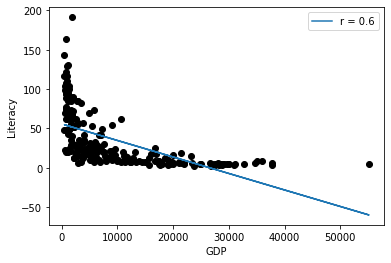

In [302]:
x=np.array(country.gdp).reshape(x.size,1)

y=country.infant_mortality

y = np.array(y).reshape(y.size,1)
y = y.astype(np.float64, copy=False)
y[np.isnan(y)] = np.median(y[~np.isnan(y)])

model = LinearRegression().fit(x, y)

'''
y=mx+b
'''
m= model.coef_
b =model.intercept_
r_sq=model.score(x, y)
r=np.sqrt(r_sq)
r_rounded=np.round(r,2)

plt.scatter(x,y,color='k')
plt.plot(x, m*x+b,'-',label = (f'r = {r_rounded}'))
plt.xlabel('GDP')
plt.ylabel('Literacy')
plt.legend()
print(m,b,np.sqrt(r_sq))

This is a nonlinear relashionship between GDP and Infant Mortality

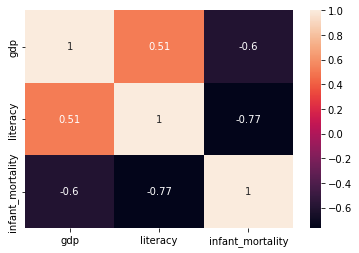

In [303]:
c = country[['gdp','literacy','infant_mortality']]
corrMatrix = c.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<BarContainer object of 11 artists>

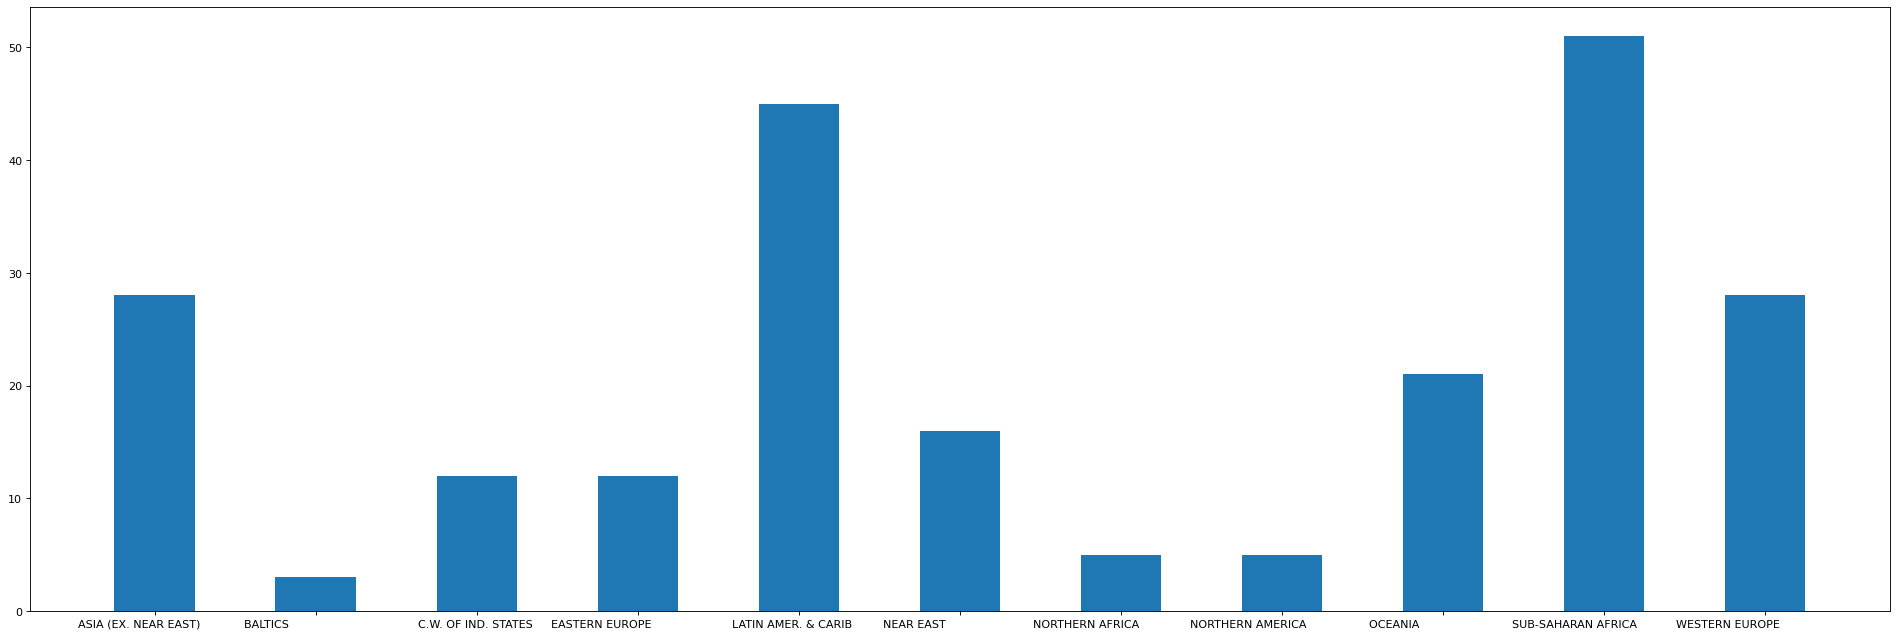

In [304]:
plt.figure(figsize=(30, 10), dpi=80)
group= country.groupby(['region'])['region'].count()
plt.bar(group.index, group.values,width=0.5)